<a href="https://colab.research.google.com/github/shjbkgkjbsd/python/blob/main/%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg'
params ={'serviceKey' : 'j2fDnqgveoCtKuNSARxf4azNlaQ1jtxYj0dDvhA+PdA01qQbz07RH0nmvsTg+KQLY3G4sgEmWUFUmB+h75AAjA==', 'returnType' : 'JSON', 'numOfRows' : '100', 'pageNo' : '1', 'inqBginDt' : '20230101', 'inqEndDt' : '20230401', 'msrstnName' : '구로구' }

res = requests.get(url, params=params)
print(res.content)

b'{"response":{"body":{"totalCount":83,"items":[{"msurDt":"2023-01-01","so2Value":".0034","coValue":".4","msrstnName":"\xea\xb5\xac\xeb\xa1\x9c\xea\xb5\xac","pm10Value":"53","no2Value":".0187","o3Value":".021","pm25Value":"35"},{"msurDt":"2023-01-02","so2Value":".0032","coValue":".3","msrstnName":"\xea\xb5\xac\xeb\xa1\x9c\xea\xb5\xac","pm10Value":"25","no2Value":".0163","o3Value":".019","pm25Value":"8"},{"msurDt":"2023-01-03","so2Value":".0033","coValue":".4","msrstnName":"\xea\xb5\xac\xeb\xa1\x9c\xea\xb5\xac","pm10Value":"30","no2Value":".0279","o3Value":".012","pm25Value":"13"},{"msurDt":"2023-01-04","so2Value":".0037","coValue":".5","msrstnName":"\xea\xb5\xac\xeb\xa1\x9c\xea\xb5\xac","pm10Value":"38","no2Value":".0398","o3Value":".008","pm25Value":"23"},{"msurDt":"2023-01-05","so2Value":".0039","coValue":".8","msrstnName":"\xea\xb5\xac\xeb\xa1\x9c\xea\xb5\xac","pm10Value":"57","no2Value":".0479","o3Value":".005","pm25Value":"39"},{"msurDt":"2023-01-06","so2Value":".0035","coValue":"

In [4]:
df

,msurDt,so2Value,coValue,msrstnName,pm10Value,no2Value,o3Value,pm25Value
0,2023-01-01,.0034,.4,구로구,53,.0187,.021,35
1,2023-01-02,.0032,.3,구로구,25,.0163,.019,8
2,2023-01-03,.0033,.4,구로구,30,.0279,.012,13
3,2023-01-04,.0037,.5,구로구,38,.0398,.008,23
4,2023-01-05,.0039,.8,구로구,57,.0479,.005,39
...,...,...,...,...,...,...,...,...
78,2023-03-28,.0032,.46,구로구,73,.0261,.0289,29
79,2023-03-29,.0038,.55,구로구,97,.0327,.0263,47
80,2023-03-30,.0041,.59,구로구,101,.0356,.0341,52
81,2023-03-31,.0041,.58,구로구,118,.0363,.0379,58


In [2]:
import json
json_file = json.loads(res.text)

In [3]:
import pandas as pd
from pandas import json_normalize
df = json_normalize(json_file['response']['body']['items'])

In [5]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

Text(0.5, 1.0, '구로구 미세먼지')

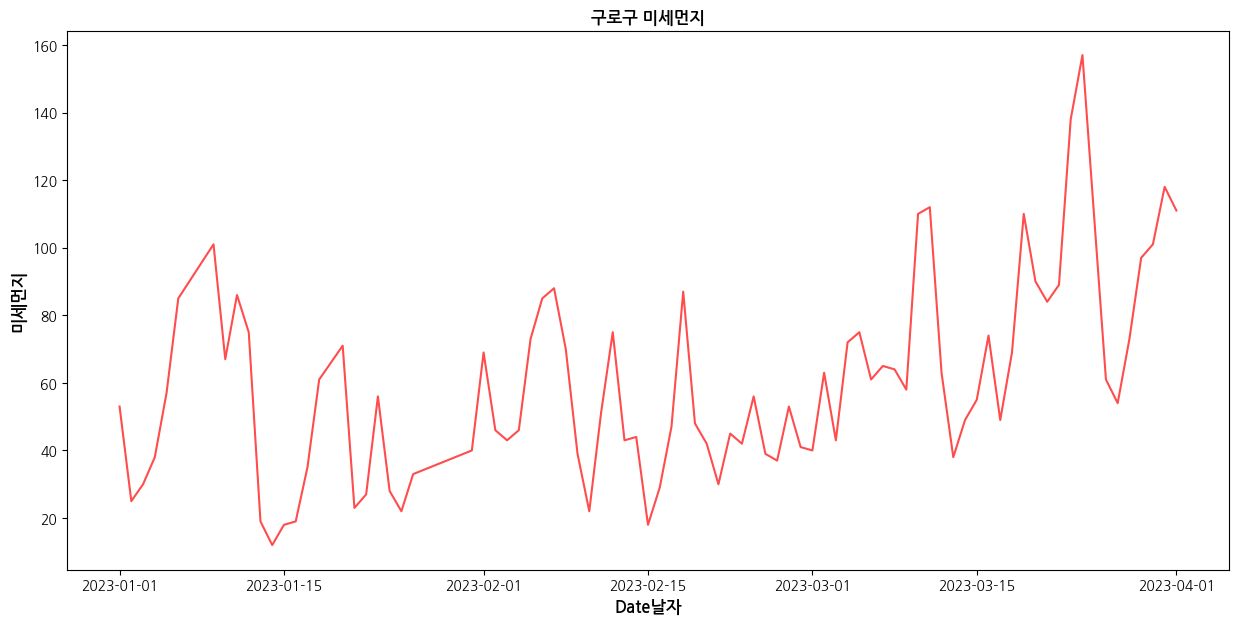

In [7]:
import matplotlib.pyplot as plt
df['msurDt'] = pd.to_datetime(df['msurDt'])
df['pm10Value'] = pd.to_numeric(df['pm10Value'], downcast='float')

fig = plt.figure(figsize=(15,7)) #사가형 크기
ax = plt.subplot(1,1,1)
ax.plot(df['msurDt'], df['pm10Value'], color='r', lw=1.5, alpha=0.7)

ax.set_xlabel('Date날자', fontweight='bold', fontsize=12)
ax.set_ylabel('미세먼지', fontweight='bold',fontsize=12)
ax.set_title('구로구 미세먼지', fontweight='bold',fontsize=12)

Text(0.5, 1.0, '구로구 초미세먼지')

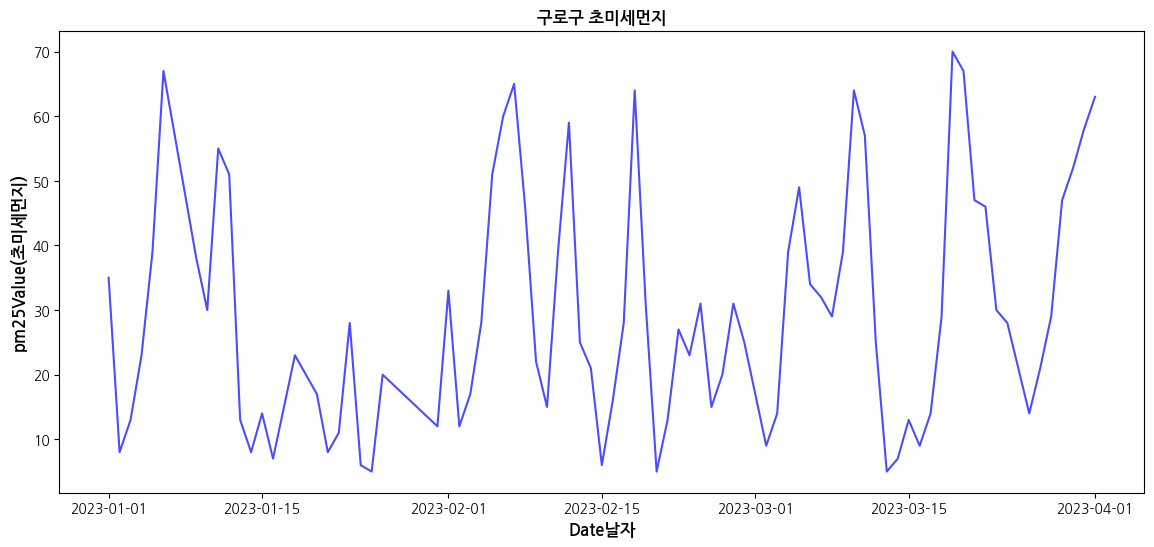

In [10]:
import matplotlib.pyplot as plt
df['msurDt'] = pd.to_datetime(df['msurDt'])
df['pm25Value'] = pd.to_numeric(df['pm25Value'], downcast='float')

fig = plt.figure(figsize=(14,6)) #사가형 크기
ax = plt.subplot(1,1,1)
ax.plot(df['msurDt'], df['pm25Value'], color='blue', lw=1.5, alpha=0.7)

ax.set_xlabel('Date날자', fontweight='bold', fontsize=12)
ax.set_ylabel('pm25Value(초미세먼지)', fontweight='bold',fontsize=12)
ax.set_title('구로구 초미세먼지', fontweight='bold',fontsize=12)

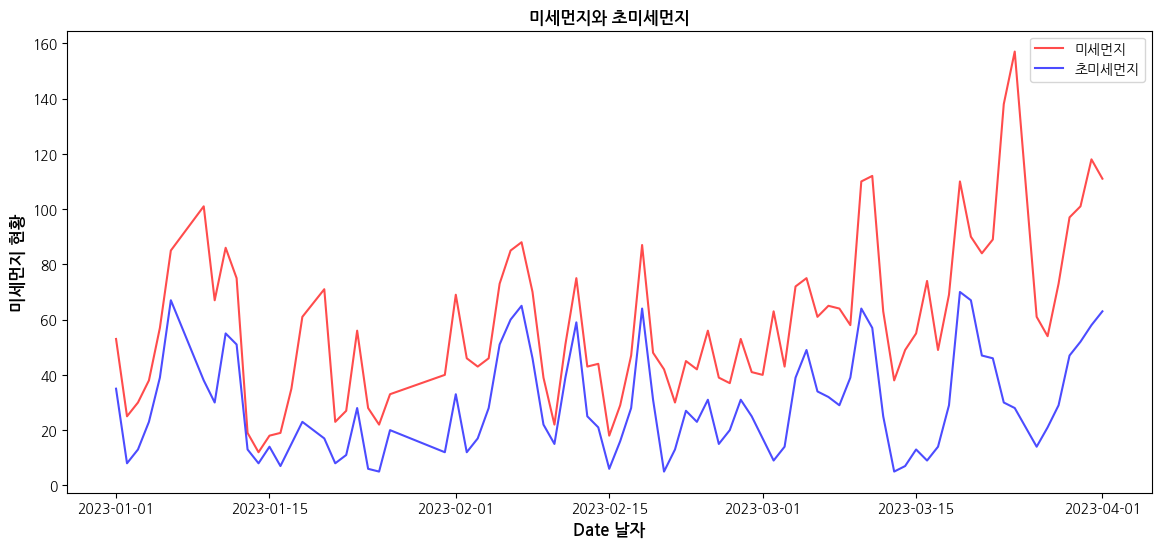

In [13]:
import matplotlib.pyplot as plt

# 'msurDt' 열을 날짜 형식으로 변환
df['msurDt'] = pd.to_datetime(df['msurDt'])

# 'pm10Value' 열을 수치형(float)으로 변환
df['pm10Value'] = pd.to_numeric(df['pm10Value'], downcast='float')

# 'pm25Value' 열을 수치형(float)으로 변환
df['pm25Value'] = pd.to_numeric(df['pm25Value'], downcast='float')

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(df['msurDt'], df['pm10Value'], color='r', lw=1.5, alpha=0.7, label='미세먼지')
plt.plot(df['msurDt'], df['pm25Value'], color='blue', lw=1.5, alpha=0.7, label='초미세먼지')

plt.xlabel('Date 날자', fontweight='bold', fontsize=12)
plt.ylabel('미세먼지 현황', fontweight='bold', fontsize=12)
plt.title('미세먼지와 초미세먼지', fontweight='bold', fontsize=12)

plt.legend()
plt.show()

